# Data

In [1]:
import re

import jieba
import pandas as pd

In [2]:
# Read the data

data = pd.read_excel('data.xls', index_col='物料碼')

data[:5]

,舊碼前兩碼,物料名稱(中),物料名稱(英),規格,廠牌,庫房別,衛屬字號
物料碼,,,,,,,
8020201,8,"""安敏寧""胎膜破裂(胎盤微球蛋白)檢測劑",ROM (Rupture Of fetal Membranes) Test (Sterile),NaN,AmniSure,1,衛署醫器輸壹011154
8020310,8,"""美敦力""因萊血糖感應器及輔助引導器(27G*10mm)",NaN,MMT-7008B,Medtronic,NaN,衛部醫器輸027206
8030871,8,12導程EKG報告紙(A4),NaN,ECG1350K,NIHON KOHDEN,1,NaN
8120010,8,1600P-A4記錄紙,1600P-A4 Paper/Color Ribbon,210*97*100,NaN,2,NaN
8120023,8,1600T-A4膠卷,1600T-A4 Trans/Color Ribbon,210*97*100,NaN,2,NaN


In [3]:
# Tokenize the names

jieba.set_dictionary('dict.txt.big')
def tokenize_chinese(name):
    if type(name) != str:
        return ''
    else:
        return ' '.join(filter(lambda x: x != '', re.split('\W', ' '.join(jieba.cut_for_search(name)))))

def tokenize_english(name):
    if type(name) != str:
        return ''
    else:
        # Use `OuO` to distinguish English tokens, so that they won't be compared against Chinese tokens (as
        # you can see, some of the Chinese names contiain English, and some of the English names contain
        # Chinese, while, generally, we don't want to treat them the same, so we're adding this `OuO` to tell
        # them apart).
        return 'OuO' + ' OuO'.join(filter(lambda x: x != '', re.split('\W', name)))

data['tokens'] = data.apply(lambda x: (tokenize_chinese(x['物料名稱(中)']) + ' ' + tokenize_english(x['物料名稱(英)'])).strip(), axis=1)

data[:5][['物料名稱(中)', '物料名稱(英)', 'tokens']]

Building prefix dict from /Users/hyl/Downloads/data/dict.txt.big ...
Loading model from cache /var/folders/wc/zxwlw615459fjb9kh6n12twr0000gn/T/jieba.u612c4ed7f861b5d81133d22687a2aaf0.cache
Loading model cost 1.646 seconds.
Prefix dict has been built succesfully.


,物料名稱(中),物料名稱(英),tokens
物料碼,,,
8020201,"""安敏寧""胎膜破裂(胎盤微球蛋白)檢測劑",ROM (Rupture Of fetal Membranes) Test (Sterile),安敏寧 胎膜 破裂 胎盤 微 蛋白 球蛋白 檢測 劑 OuOROM OuORupture O...
8020310,"""美敦力""因萊血糖感應器及輔助引導器(27G*10mm)",NaN,美敦力 因萊 血糖 感應 感應器 及 輔助 引導 器 27G 10mm
8030871,12導程EKG報告紙(A4),NaN,12 導程 EKG 報告 報告紙 A4
8120010,1600P-A4記錄紙,1600P-A4 Paper/Color Ribbon,1600P A4 記錄 記錄紙 OuO1600P OuOA4 OuOPaper OuOCol...
8120023,1600T-A4膠卷,1600T-A4 Trans/Color Ribbon,1600T A4 膠卷 OuO1600T OuOA4 OuOTrans OuOColor O...


# TF-IDF Model

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# Build the TF-IDF Vectorizer, and then use it to build the document TF-IDF

vectorizer = TfidfVectorizer()  # the default token pattern doesn't expect `@`
vectorizer.fit(data['tokens'])
tfidf = vectorizer.transform(data['tokens'])

del data['tokens']

vectorizer.vocabulary_

{'安敏寧': 12902,
 '胎膜': 16264,
 '破裂': 15602,
 '胎盤': 16263,
 '蛋白': 16659,
 '球蛋白': 15228,
 '檢測': 14468,
 'ouorom': 8387,
 'ouorupture': 8416,
 'ouoof': 7707,
 'ouofetal': 6384,
 'ouomembranes': 7427,
 'ouotest': 9022,
 'ouosterile': 8805,
 '美敦力': 16110,
 '因萊': 12497,
 '血糖': 16706,
 '感應': 13505,
 '感應器': 13506,
 '輔助': 17155,
 '引導': 13290,
 '27g': 793,
 '10mm': 249,
 '12': 283,
 '導程': 13020,
 'ekg': 2596,
 '報告': 12596,
 '報告紙': 12599,
 'a4': 1774,
 '1600p': 418,
 '記錄': 16882,
 '記錄紙': 16887,
 'ouo1600p': 3949,
 'ouoa4': 4919,
 'ouopaper': 7846,
 'ouocolor': 5706,
 'ouoribbon': 8367,
 '1600t': 419,
 '膠卷': 16392,
 'ouo1600t': 3950,
 'ouotrans': 9142,
 '3m': 1058,
 '立即': 15744,
 '判讀': 11896,
 '滅菌': 14933,
 '驗證': 18098,
 '8670': 1670,
 '熱昇': 15079,
 '昇華': 14080,
 '熱昇華': 15080,
 '相紙': 15526,
 'ouo8': 4802,
 'ouo5': 4540,
 'ouo12in': 3842,
 'ouo100': 3731,
 'ouos': 8423,
 'adac': 1808,
 '熱感': 15077,
 '彩色': 13332,
 '印表': 12128,
 '印表機': 12129,
 '色帶': 16479,
 'ouo4卷': 4535,
 'ouo箱': 9905,
 'ouo135張': 38

In [6]:
# Use `Vicryl 4-0 角針(12條/盒)` as query to test the TF-IDF model

query_tfidf = tfidf[483]

scores = cosine_similarity(query_tfidf, tfidf).flatten()
top_20 = scores.argsort()[::-1][:20]

data.iloc[top_20]

,舊碼前兩碼,物料名稱(中),物料名稱(英),規格,廠牌,庫房別,衛屬字號
物料碼,,,,,,,
10050431,10,Vicryl 4-0 角針(12條/盒),NaN,J496G,ETHICON,2,衛署醫器輸017689
10050428,10,Vicryl 4-0 整型角針(12條/盒),NaN,J494G,ETHICON,2,衛署醫器輸002825
10050525,10,Vicryl 5-0 整型角針-(12條/盒),NaN,J493G,ETHICON,1,衛署醫器輸002825
10050622,10,Vicryl 6-0 整型角針(12條/盒),NaN,J510G,ETHICON,1,衛署醫器輸017689
10050703,10,Vicryl 7-0(12條/盒),NaN,J546G,J&J,2,衛署醫器輸002825
10050253,10,Vicryl 2-0 角針(36條/盒),NaN,J472H,ETHICON,2,衛部醫器輸030126
10050351,10,Vicryl 3-0 角針 (36條/盒),NaN,J423H,ETHICON,2,衛署醫器輸002825
10050415,10,Vicryl 4-0 角針-(36條/盒),NaN,J422H,ETHICON,1,衛署醫器輸002825
10050458,10,Vicryl 4-0 圓針(12條/盒),NaN,W9113,ETHICON,2,衛署醫器輸002825


# K-means Model

In [7]:
import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Performing first-level clustering (N = 14924) ...
Took 6.98 seconds for K-means (K = 46), and the inertia is 13610.990141


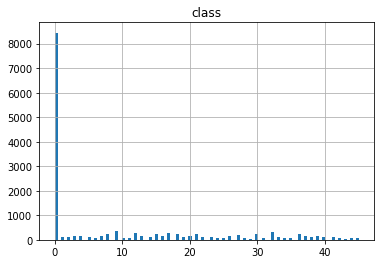

Performing sub-level clustering on class 0 (N = 8445) ...
Took 4.11 seconds for K-means (K = 37), and the inertia is 8028.461970


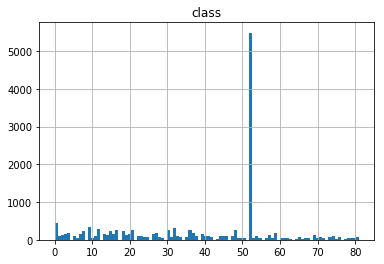

Performing sub-level clustering on class 52 (N = 5487) ...
Took 2.35 seconds for K-means (K = 31), and the inertia is 5282.490929


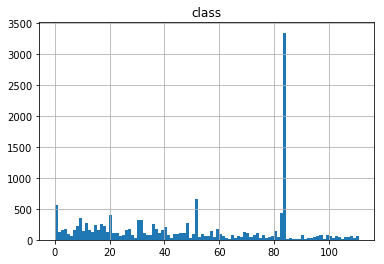

Performing sub-level clustering on class 84 (N = 3350) ...
Took 1.64 seconds for K-means (K = 25), and the inertia is 3214.370550


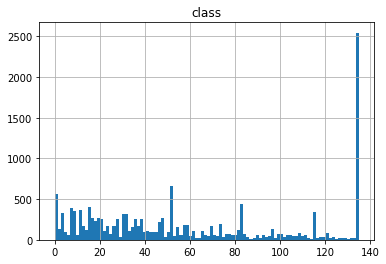

Performing sub-level clustering on class 134 (N = 2534) ...
Took 0.81 seconds for K-means (K = 22), and the inertia is 2439.222129


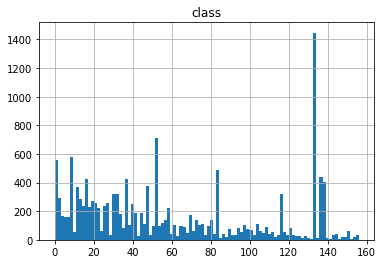

Here's the final class distribution:

134    1425
52      665
0       454
83      434
136     430
138     404
9       350
116     319
32      317
12      278
48      271
17      262
36      256
21      255
30      248
15      239
18      228
8       228
59      177
27      176
4       168
37      167
16      166
26      165
13      164
7       160
3       160
39      155
20      143
57      138
       ... 
91       17
88       17
155      16
85       15
114      14
111      14
123      13
154      13
135      12
147      12
142      11
145      11
127      11
119      11
89       10
105      10
128      10
125      10
153       9
132       9
87        9
140       8
139       8
146       8
137       7
148       7
131       7
141       6
152       6
130       4
Name: class, Length: 157, dtype: int64


In [8]:
# Predict classes

# Fix random seed for reproducibility
np.random.seed(1487)

# K-means
def fit_predict_kmeans(tfidf, k):
    clf = KMeans(n_clusters=k, n_jobs=8)

    t0 = time.time()
    classes = clf.fit_predict(tfidf)
    print('Took {:.2f} seconds for K-means (K = {}), and the inertia is {:.6f}'.format(time.time() - t0, k, clf.inertia_))
    
    return classes

# First-level clustering
k_from_n = lambda n: int(n**0.4)

n = tfidf.shape[0]
k = k_from_n(n)
print('Performing first-level clustering (N = {}) ...'.format(n))
classes = fit_predict_kmeans(tfidf, k)
data['class'] = classes

data.hist(column='class', bins=100)
plt.show()

# Sub-level clustering
for t in range(2, 6):
    sub_level_class = data['class'].value_counts().index[0]
    indices = (data['class'] == sub_level_class).values
    
    n = indices.sum()
    k = k_from_n(n)
    print('================================================================================')
    print('Performing sub-level clustering on class {} (N = {}) ...'.format(sub_level_class, n))
    classes = fit_predict_kmeans(tfidf[indices], k)
    
    # sub-classes should start with `max_class + 1`, and we'd also like to keep `sub_level_class`, so ...
    max_class = data['class'].max()
    classes += max_class  # 0 -> max_class, 1 -> max_class + 1, ...
    classes[classes == max_class] = sub_level_class  # max_class -> sub_level_class
    
    data.loc[indices, 'class'] = classes
    
    data.hist(column='class', bins=100)
    plt.show()

# Take a detailed look at the final class distribution
print('================================================================================')
print('Here\'s the final class distribution:')
print()
print(data['class'].value_counts())

In [9]:
# Get a sample of data to see the clustering results

def prepend_class_to_index(data):
    return data.reset_index().set_index(['class', '物料碼']).sort_index()

prepend_class_to_index(data.groupby('class').head(5))

舊碼前兩碼                         物料名稱(中)  \
class 物料碼                                               
0     8020203       8                   優勝血糖試紙(10片/盒)   
      10131016     10        10-0 眼用尼龍縫合線_Nylon  CU-1   
      10530141     10   45mm愛喜龍弗雷斯安德派思可彎式縫合器 (23cm短槍)   
      10530142     10  45mm愛喜龍弗雷斯安德派思可彎式縫合器 (34cm標準槍)   
      10530143     10  45mm愛喜龍弗雷斯安德派思可彎式縫合器 (44cm加長槍)   
1     55072409     55           原廠墨水匣 T122100 #85N 黑色   
      55072410     55           原廠墨水匣 T122200 #85N 藍色   
      55072411     55           原廠墨水匣 T122300 #85N 紅色   
      55072412     55           原廠墨水匣 T122400 #85N 黃色   
      55077963     55                ABR腦幹聽神經誘發反應繪圖墨水   
2     14104051     14              曲克蘭尼思胸主動脈瘤支架(使用1支)   
      14104086     14                 戈爾胸主動脈瘤支架(使用1支)   
      14104087     14            戈爾胸主動脈瘤支架(使用4支(含)以上)   
      14104088     14                 戈爾胸主動脈瘤支架(使用3支)   
      14104089     14                 戈爾胸主動脈瘤支架(使用2支)   
3     22011732     22                              骨釘   
      22011733     22                              骨釘   
      22011734     22                              骨釘   
      22011735     22                              骨釘   
      22011736     22                              骨釘   
4     24813184     24                             NaN   
      24813197     24                             NaN   
      24813207     24                             NaN   
      24813375     24      Wide Dia. Healing Abutment   
      24822202     24                   Bio-Com 內六角植體   
5     8110486       8                 支氣管纖維內視鏡彩色相紙&色帶   
      12150081     12                        支氣管鏡用生檢鉗   
      14278061     14            5Fr柔得多內管型氣切管(可發聲無氣囊)   
      14278062     14            6Fr柔得多內管型氣切管(可發聲無氣囊)   
      14278063     14            7Fr柔得多內管型氣切管(可發聲無氣囊)   
...               ...                             ...   
151   18031026     18                     超快乾石膏(石膏繃帶)   
      18031039     18                            樹脂石膏   
      18031042     18                            樹脂石膏   
      18031055     18                            樹脂石膏   
      18031056     18                            樹脂石膏   
152   80570071     80                         YTM 迫緊帶   
      80570072     80                         YTM 迫緊帶   
      80570073     80                         YTM 迫緊帶   
      80570074     80                         YTM 迫緊帶   
      80570075     80                         YTM 迫緊帶   
153   26042826     26                       EW-30空氣濾心   
      55091547     55                           空氣除臭劑   
      55091550     55                  Bio 空氣清淨劑(活性碳)   
      68010031     68                            前置濾芯   
      68010035     68                       CO2空氣過 濾芯   
154   19255065     19                 心包膜代用膜(1PCM100)   
      19255066     19                 心包膜代用膜(1PCM102)   
      19255067     19             普瑞得福心包膜代用膜(1PCM103)   
      23581493     23                瑞德達菲小骨釘-埋頭中空加壓骨釘   
      23581494     23                瑞德達菲小骨釘-埋頭中空加壓骨釘   
155   9131035       9                             安全瓶   
      15011061     15        "怡安"點滴輸液套-免針式安全型(IV Set)   
      62810067     62                  各級主管安全觀察與巡視稽核表   
      62810096     62                   承攬人安全衛生訓練課程護照   
      62810119     62                 本院勞工安全衛生教育訓練課程記   
156   8030799       8                      中耳功能分析用熱感紙   
      8030809       8                    熱感紙(中耳功能分析用)   
      24871162     24                        植牙工作分析模型   
      24871267     24                        植牙工作分析模型   
      24871376     24                        植牙工作分析模型   

                                                          物料名稱(英)  \
class 物料碼                                                           
0     8020203                               ACCU-CHEK PER. FR. CT   
      10131016                                              12條/盒   
      10530141  "ETHICON"ECHELON Flex Endopath Stapler Areicul...   
      10530142  "ETHICON"ECHELON Flex Endopath Stapler Areicul...   
      1053

In [10]:
# Output the results

prepend_class_to_index(data).to_excel('clustered_data.xls')